# ch11. paried sample t-test

t-test를 이용하여 동일한 집단에 대해서 실험 전과 실험 후의 측정값의 차이를 추론함으로써 실험의 효과를 입증할 수도 있습니다. 예를들어 보겠습니다.

*Q. 한 제약회사에서 신약을 개발하였다. 이 약은 고혈압 환자들의 혈압을 크게 낮출 수 있다고 한다. 이를 확인하기 위해 고혈압 환자의 혈압을 측정하고, 약을 투여한 다음 혈압을 다시 측정하여 신약 투여 전과 후의 차이가 있는지를 보여라.*

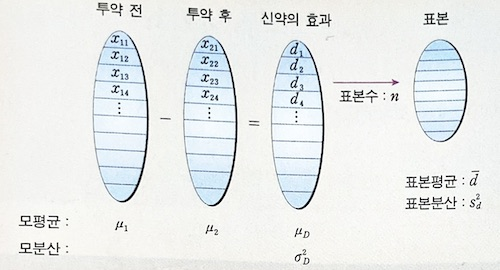

이 경우, 약물 투약 전과 후의 차이인 d의 표본 평균을 가지고 d의 모평균에 대한 추정을 함으로써 신약의 효과를 추정할 수 있습니다.

### 가설 설정

귀무 가설: 전과 후의 차의 평균은 0일 것이다.
대립 가설: 전과 후의 차의 평균은 0이 아닐 것이다.

$$H_{0}: \mu_{D}=0$$
$$H_{a}: \mu_{D}\neq0$$

### t 통계량 설정

동일한 집단의 전과 후를 비교하는 paired sample t-test에서 t 통계량 수식은 아래와 같습니다. 누누히 말씀드리지만 외울 필요가 전혀 없습니다.

$$t_{\bar{D}}=\frac{\bar{D}-\mu_{D}}{\sqrt{\frac{S_{D}^2}{n}}}\sim t_{n-1}$$

$$df=n-1$$

### p-value 계산 및 통계적 의사결정
t 통계량과 자유도를 알 수 있으니, t 분포표를 활용하여 기각역을 찾고, 유의 수준보다 낮은지 검정하면 됩니다. 혹은 컴퓨터를 이용하여 p-value를 직접 계산할 수도 있습니다. 이를 통해 유의 수준 보다 낮다면 전과 후의 평균이 유의미하게 다르다는 결론을 내릴 수 있습니다.

## 예제

이전 챕터에서 진행했던 수학 점수 데이터 셋에서 G1 시험 점수와 G3 시험 점수 사이에 유의미한 차이가 있는지를 t test를 통해서 검정해보겠습니다. 

In [3]:
import pandas as pd
from scipy import stats

In [4]:
df = pd.read_csv("./data/student-mat.csv")

In [5]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [6]:
df[["G1", "G3"]].describe()

,G1,G3
count,395.000000,395.000000
mean,10.908861,10.415190
std,3.319195,4.581443
min,3.000000,0.000000
25%,8.000000,8.000000
50%,11.000000,11.000000
75%,13.000000,14.000000
max,19.000000,20.000000


단순히 G3의 평균이 G1보다 낮다로 결론을 내리지 말고, paired sample t-test로 통계적 의사결정을 해보겠습니다.  

### 양측 검정
먼저 양측 검정을 해보겠습니다. 이 때의 대립 가설은 G1과 G3 점수가 서로 같지 않다가 됩니다.

In [7]:
t_statistics, p_value = stats.ttest_rel(
    a=df["G1"],
    b=df["G3"],
    alternative="two-sided"
) 

In [8]:
t_statistics, p_value

(3.5517031247185855, 0.0004290673865804163)

p-value가 0.05보다 작아서 유의하다는 결론이 나옵니다.


### 단측 검정
이번에는 G1 점수가 G3보다 크다는 대립 가설로 단측 검정을 해보겠습니다.

In [9]:
t_statistics, p_value = stats.ttest_rel(
    a=df["G1"],
    b=df["G3"],
    alternative="greater"
) 

In [10]:
t_statistics, p_value 

(3.5517031247185855, 0.00021453369329020816)

In [11]:
t_statistics, p_value = stats.ttest_rel(
    a=df["G1"],
    b=df["G3"],
    alternative="less"
) 

In [12]:
p_value < 0.05

False

이전에 살펴보았든, G1의 평균이 G3의 평균보다 컸습니다. 단측 검정에서도 G1 점수가 G3 점수보다 크다는 대립 가설로 검정을 했을 때 p-value가 0.0002로 앞서 양측 검정을 했을 때 보다 더 유의하다는 결론이 나왔습니다.

마지막으로 G3가 G1보다 크다는 대립가설로 단측 검정을 해보겠습니다.

In [13]:
from scipy import stats

t_statistics, p_value = stats.ttest_rel(
    a=df["G3"],
    b=df["G1"],
    alternative="less"
) 

In [14]:
t_statistics

-3.5517031247185855

In [15]:
p_value, p_value < 0.05

(0.00021453369329020816, True)

In [16]:
t_statistics, p_value

(-3.5517031247185855, 0.00021453369329020816)

이 때의 p-value는 0.99로 전혀 유의하지 않다는 결론을 내릴 수 있습니다.

## 정리
이번 챕터에서는 t-test 기법 중 하나인 paired t-test의 개념을 살펴보고 예제를 풀어보았습니다. t-test는 여기서 마무리하고, chi-square test로 넘어가 보겠습니다.